# Tuning curves

author: steeve.laquitaine@epfl.ch

### Setup 

setup spikeinterf...

In [2]:
import os
import spikeinterface as si

PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)

from src.nodes import utils
from src.nodes.utils import get_config
from src.nodes.metrics.quality import get_scores

# SETUP PATHS
data_conf, _ = get_config("silico_neuropixels", "stimulus").values()
K4 = data_conf["sorting"]["sorters"]["kilosort4"]["output"]
K3 = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
K25 = data_conf["sorting"]["sorters"]["kilosort2_5"]["output"]
K2 = data_conf["sorting"]["sorters"]["kilosort2"]["output"]
K1 = data_conf["sorting"]["sorters"]["kilosort"]["output"]
HS = data_conf["sorting"]["sorters"]["herdingspikes"]["output"]
GT = data_conf["sorting"]["simulation"]["ground_truth"]["output"]

# parameters
DT = 1.3
SAVE = False

# saving path
tuning_curve_path = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/sorting/0_silico/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids/0fcb7709-b1e9-4d84-b056-5801f20d55af/analysis/neural_code/tuning_curves/"

2024-09-25 11:08:15,857 - root - utils.py - get_config - INFO - Reading experiment config.
2024-09-25 11:08:15,900 - root - utils.py - get_config - INFO - Reading experiment config. - done


### SortingExtractors

In [3]:
print("SortingExtractors path:", data_conf["sorting"]["sorters"]["kilosort4"]["output"])
print("SortingExtractors path:", data_conf["sorting"]["sorters"]["kilosort3"]["output"])
print(
    "SortingExtractors path:", data_conf["sorting"]["sorters"]["kilosort2_5"]["output"]
)
print("SortingExtractors path:", data_conf["sorting"]["sorters"]["kilosort"]["output"])
print(
    "SortingExtractors path:",
    data_conf["sorting"]["sorters"]["herdingspikes"]["output"],
)

SortingExtractors path: /gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/sorting/0_silico/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids/0fcb7709-b1e9-4d84-b056-5801f20d55af/SortingKS4/
SortingExtractors path: /gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/sorting/0_silico/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids/0fcb7709-b1e9-4d84-b056-5801f20d55af/SortingKS3/
SortingExtractors path: /gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/sorting/0_silico/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids/0fcb7709-b1e9-4d84-b056-5801f20d55af/SortingKS2_5/
SortingExtractors path: /gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/sorting/0_silico/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids/0fcb7709-b1e9-4d84-b056-5801f20d55af/Sortin

### Accuracy scores

In [4]:
GT = si.load_extractor(K4)
scoresk4 = get_scores(si.load_extractor(K4), GT, DT)
scoresk3 = get_scores(si.load_extractor(K3), GT, DT)
scoresk25 = get_scores(si.load_extractor(K25), GT, DT)
# scoresk2 = get_scores(si.load_extractor(K2), GT, DT) # fails
scoresk1 = get_scores(si.load_extractor(K1), GT, DT)
scoreshs = get_scores(si.load_extractor(HS), GT, DT)

### Plot

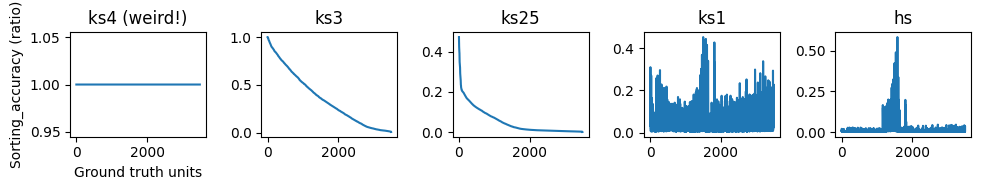

In [7]:
from matplotlib import pyplot as plt

# plots
fig, ax = plt.subplots(1, 5, figsize=(10, 2))
ax[0].plot(sorted(scoresk4.max(axis=0), reverse=True))
ax[1].plot(sorted(scoresk3.max(axis=0), reverse=True))
ax[2].plot(sorted(scoresk25.max(axis=0), reverse=True))
ax[3].plot(scoresk1.max(axis=0))
ax[4].plot(scoreshs.max(axis=0))

# title
ax[0].set_title("ks4 (weird!)")
ax[1].set_title("ks3")
ax[2].set_title("ks25")
ax[3].set_title("ks1")
ax[4].set_title("hs")

# labels
ax[0].set_ylabel("Sorting_accuracy (ratio)")
ax[0].set_xlabel("Ground truth units")
plt.tight_layout()

In [13]:
# well detected unit ratio
print(sum(scoresk3.max(axis=0) >= 0.80) / len(scoresk3.max(axis=0)))
print(sum(scoresk25.max(axis=0) >= 0.80) / len(scoresk25.max(axis=0)))

0.08781464530892448
0.0


In [6]:
if SAVE:
    utils.create_if_not_exists(tuning_curve_path)
    # scoresk4.to_csv(tuning_curve_path + "scores_ks4.csv", index=True)
    scoresk3.to_csv(tuning_curve_path + "scores_ks3.csv", index=True)
    scoresk25.to_csv(tuning_curve_path + "scores_ks25.csv", index=True)
    scoresk1.to_csv(tuning_curve_path + "scores_ks1.csv", index=True)
    scoreshs.to_csv(tuning_curve_path + "scores_hs.csv", index=True)